## MFA for Cantonese

In [1]:
%%writefile install_mfa.sh
#!/bin/bash

## a script to install Montreal Forced Aligner (MFA)

root_dir=${1:-/tmp/mfa}
mkdir -p $root_dir
cd $root_dir

# download miniconda3
wget -q --show-progress https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
bash Miniconda3-latest-Linux-x86_64.sh -b -p $root_dir/miniconda3 -f

# create py38 env
$root_dir/miniconda3/bin/conda create -n aligner -c conda-forge openblas python=3.8 openfst pynini ngram baumwelch -y
source $root_dir/miniconda3/bin/activate aligner

# install mfa, download kaldi
pip install montreal-forced-aligner # install requirements
pip install git+https://github.com/MontrealCorpusTools/Montreal-Forced-Aligner.git # install latest updates

mfa thirdparty download

echo -e "\n======== DONE =========="
echo -e "\nTo activate MFA, run: source $root_dir/miniconda3/bin/activate aligner"
echo -e "\nTo delete MFA, run: rm -rf $root_dir"
echo -e "\nSee: https://montreal-forced-aligner.readthedocs.io/en/latest/aligning.html to know how to use MFA"

Writing install_mfa.sh


In [2]:
# download and install mfa
INSTALL_DIR="/tmp/mfa" # path to install directory

!bash ./install_mfa.sh {INSTALL_DIR}
# !source {INSTALL_DIR}/miniconda3/bin/activate aligner; mfa align --help

Miniconda3-latest-L 100%[===================>]  63.62M   175MB/s    in 0.4s    
PREFIX=/tmp/mfa/miniconda3
Unpacking payload ...
Solving environment: - \ | done

## Package Plan ##

  environment location: /tmp/mfa/miniconda3

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py39h27cfd23_1003
    - ca-certificates==2021.7.5=h06a4308_1
    - certifi==2021.5.30=py39h06a4308_0
    - cffi==1.14.6=py39h400218f_0
    - chardet==4.0.0=py39h06a4308_1003
    - conda-package-handling==1.7.3=py39h27cfd23_1
    - conda==4.10.3=py39h06a4308_0
    - cryptography==3.4.7=py39hd23ed53_0
    - idna==2.10=pyhd3eb1b0_0
    - ld_impl_linux-64==2.35.1=h7274673_9
    - libffi==3.3=he6710b0_2
    - libgcc-ng==9.3.0=h5101ec6_17
    - libgomp==9.3.0=h5101ec6_17
    - libstdcxx-ng==9.3.0=hd4cf53a_17
    - ncurses==6.2=he6710b0_1
    - openssl==1.1.1k=h27cfd23_0
    - pip==21.1.3=py39h06a4308_0
    - pycosat==0.6.3=py39h27cfd23_0
    - pycparser==2.

In [3]:
!git clone https://github.com/slrlab-tech/cantonese-tone-passage.git

Cloning into 'cantonese-tone-passage'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 26 (delta 8), reused 11 (delta 4), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [4]:
%cd cantonese-tone-passage
!source {INSTALL_DIR}/miniconda3/bin/activate aligner; \
mfa align sample cantonese_pronunciation.dict cantonese_model.zip output -j4 -c
%cd ..

/content/cantonese-tone-passage
All required kaldi binaries were found!
/root/Documents/MFA/sample/align.log
INFO - Setting up corpus information...
INFO - Number of speakers in corpus: 1, average number of utterances per speaker: 1.0
INFO - Parsing dictionary without pronunciation probabilities without silence probabilities
INFO - Creating dictionary information...
INFO - Setting up training data...
Generating base features (mfcc)...
Calculating CMVN...
INFO - Done with setup!
INFO - Performing first-pass alignment...
INFO - Calculating fMLLR for speaker adaptation...
INFO - Performing second-pass alignment...
INFO - All done!
/content


# Praat for obtaining F0

In [5]:
!sudo apt-get install praat

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libasound2-plugins libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common liborc-0.4-0 libpulsedsp libsnapd-glib1 libspeexdsp1
  libtdb1 libwebrtc-audio-processing1 osspd osspd-pulseaudio pulseaudio
  pulseaudio-utils rtkit
Suggested packages:
  gvfs snapd pavumeter pavucontrol paman paprefs ubuntu-sounds avahi-daemon
The following NEW packages will be installed:
  libasound2-plugins libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common liborc-0.4-0 libpulsedsp libsnapd-glib1 libspeexdsp1
  libtdb1 libwebrtc-audio-processing1 osspd osspd-pulseaudio praat pulseaudio
  pulseaudio-utils rtkit
0 upgraded, 18 newly installed, 0 to remove and 40 not upgraded.
Need to get 15.3 MB of archives.
After this operation, 65.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd

In [6]:
!/usr/bin/praat --run cantonese-tone-passage/measuretones_colab.praat sample/Northwind_Sun.wav output/Northwind_Sun.TextGrid Northwind_Sun

1	jau5
2	jat1
3	ci3
5	fung1
6	wo4
7	taai3
8	joeng4
9	zing3
10	zoi6
11	zaang1
12	leon6
13	seoi4
14	bei2
15	gaau3
16	jau5
17	bun2
18	si6
20	mun4
21	zing3
22	hou2
23	hon3
24	dou3
25	jau5
26	go3
27	jan4
28	zau2
29	gwo3
30	naa5
32	jan4
33	cyun1
34	zoek6
35	jat1
36	gin6
37	dau2
38	pung4
39	taa1
40	mun4
41	zau6
43	liu5
44	seoi6
45	ho2
46	ji3
47	joeng6
48	naa5
50	jan4
52	diu6
53	naa5
54	gin6
55	dau2
56	pung4
57	zau6
58	syun3
59	seoi4
60	bei2
61	gaau3
62	jau5
63	bun2
64	si6
65	jyu1
66	si6
68	fung1
69	zau6
70	ping3
71	ming6
72	dei6
73	ceoi1
74	zam2
75	liu6
77	ceoi1
79	jyut6
80	lei6
81	hoi6
82	naa5
84	jan4
85	zau6
86	jyut6
88	jung6
89	dau2
90	pung4
91	baau1
92	gan2
93	zi6
94	gei2
95	zeoi3
96	hau6
98	fung1
99	mut6
100	baan6
101	faat3
102	zi2
103	hou2
104	fong3
105	hei3
107	zoek6
108	taai3
109	joeng4
111	loi4
112	saai3
113	liu5
115	haa5
116	naa5
118	jan4
119	zau6
120	laap6
121	haak1
122	baa2
123	dau2
124	pung4
126	diu6
127	liu5
128	jyu1
129	si6
131	fung1
132	zi2
133	hou2
134	jing6
135	syu1
136	liu5

# R for plotting contour

In [7]:
%load_ext rpy2.ipython

In [8]:
%%R
library(tidyverse)
library(magrittr)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: 
Attaching package: ‘magrittr’


R[write to console]: The following object is masked from ‘package:purrr’:

    set_names


R[write to console]: The following object is masked from ‘package:tidyr’:

    extract




In [10]:
%%R
data <- read_csv("/content/cantonese-tone-passage/Northwind_Sun.csv")

Rows: 118 Columns: 32
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (29): wordLabel, vowelLabel, toneNumber, F0-0, F0-5, F0-10, F0-15, F0-20...
dbl  (3): token_number, toneStart, toneDuration

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [11]:
%%R
data %<>%
    # Replace "T<>" with "unknown"
    mutate(prevTone = str_replace(prevTone,"T<>", "unknown"),
           nextTone = str_replace(nextTone, "T<>", "unknown")) %>%
    # Replace "^T$" (^ = start of string, $ = end of string) with "pause"
    mutate(prevTone = str_replace(prevTone, "^T$", "pause"),
           nextTone = str_replace(nextTone, "^T$", "pause"))
    
data %<>%
    filter(!is.na(prevTone))


##### Get F0 measurements ready for analyzing data #####
data %<>%
    # Gather all F0 measurements into a single column so we can manipulate them using the mutate command
    # This is going to make our data "longer" instead of "wider"
    # Every F0 measurement (every observation) will be on its own row
    pivot_longer(names_to = "Timepoint", values_to = "F0", starts_with("F0")) %>%
    # Get rid of undefined values
    filter(F0 != "--undefined--") %>%
    # Get rid of "F0-" in the Timepoint column and make numeric
    mutate(Timepoint = str_replace(Timepoint, "F0-", "")) %>%
    # Redfine columns as "numeric" instead of "character"
    mutate(F0 = as.numeric(F0),
           Timepoint = as.numeric(Timepoint))
    
# We'll exclude the first and last 15% of the toneNumber to avoid boundary effects
data %<>%
    filter(Timepoint > 10 & Timepoint < 90)

# Let's have a look!
# Plot raw toneNumber contours
# data %>%
#   ggplot(aes(x = Timepoint, y = F0, color = toneNumber, group = token_number)) + 
#   geom_line()

In [12]:
%%R
# Get overall mean and median F0 for each speaker
data %<>%
    mutate(meanF0 = mean(F0),
              medianF0 = median(F0)) %>%
    right_join(data)

# data %<>%
#     left_join(semitoneNumber.references)

data %<>%
    mutate(F0.st = (12 * log(F0 / medianF0)) / log(2))

Joining, by = c("token_number", "wordLabel", "vowelLabel", "toneNumber", "toneStart", "toneDuration", "syllType", "onset", "coda", "prevTone", "nextTone", "Timepoint", "F0")


`summarise()` has grouped output by 'Timepoint'. You can override using the `.groups` argument.


R[write to console]: `geom_smooth()` using formula 'y ~ x'



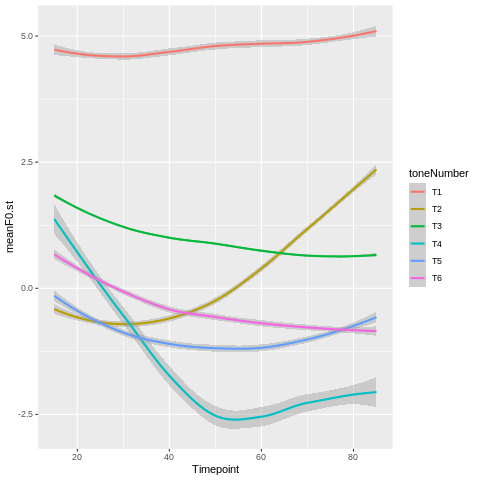

In [13]:
%%R
####### Plot Normalized toneNumbers ######

# Plot overall toneNumber inventories for individual speakers
data %>%
    group_by(Timepoint, toneNumber) %>%
    summarise(meanF0.st = mean(F0.st)) %>% 
    ggplot(aes(x = Timepoint, y = meanF0.st, color = toneNumber, group = toneNumber)) + 
      geom_smooth(method="loess")